The goal is to produce visualization of the 8 beer styles we defined (reviews_categorized.pkl was produced by CategorizeReviewsBeerStyles class in file categorize_reviews_beer_styles.py)
We are embedding everything in a vector space so we can measure similarity of the review embedding with the embedding of the 5 beer characteristics. The beer characteristics are defined with keywords (see constructor of `BeerCharacteristicsAnalysisPipeline`), with those keywords we create a centroid for each bee characteristic that is used as a representative vector in the embedding vector space.

In [2]:
import pathlib
from src.models.transformer_analysis_model import BeerCharacteristicsAnalysisPipeline

data_dir_path = pathlib.Path("../../data")

In [4]:
pipeline = BeerCharacteristicsAnalysisPipeline()
pipeline.characteristics

{'Hop Intensity': ['bitter', 'hoppy', 'citrus', 'pine', 'resinous'],
 'Malt Profile': ['sweet', 'caramel', 'toffee', 'roasted', 'chocolate'],
 'Body/Texture': ['light', 'medium-bodied', 'full-bodied', 'creamy', 'smooth'],
 'Alcohol Strength': ['boozy', 'warming', 'strong', 'high ABV'],
 'Carbonation': ['crisp', 'bubbly', 'effervescent', 'flat']}

In [ ]:
# need GPU to run the whole pipeline in a reasonable amount of time

# input dataframe
reviews_categorized_path = data_dir_path / "generated" / "reviews_categorized.pkl"

# first embed all the reviews
dst_path = data_dir_path / "generated" / "reviews_categorized_embedded_fast.pkl"
pipeline.perform_embedding_on_reviews(reviews_categorized_path, dst_path)

# then compute similarities of the embedding of the reviews with the 5 beer characteristics
dst_path2 = data_dir_path / "generated" / "reviews_with_similarities.pkl"
pipeline.compute_similarities(dst_path, dst_path2)

style_characteristics_df = pipeline.aggregate_by_style(dst_path2)

style_characteristics_scaled = pipeline.rescale_style_characteristics(style_characteristics_df)

print(style_characteristics_scaled)

,Hop Intensity,Malt Profile,Body/Texture,Alcohol Strength,Carbonation
general_style,,,,,
IPA,0.000000,0.317917,0.291595,0.957275,0.440857
Lager,0.874115,0.180634,0.510071,1.000000,0.384857
Other Ale,0.601166,0.401276,0.220932,0.413940,0.663696
Pale Ale,0.403809,0.465897,0.211700,0.536957,0.504517
Pilsner,0.114685,0.319550,1.000000,0.989746,0.928864
Porter,1.000000,1.000000,0.425354,0.689484,1.000000
Red/Amber Ale,0.070862,0.000000,0.330063,0.569305,0.499420
Stout,0.078369,0.178665,0.000000,0.000000,0.000000


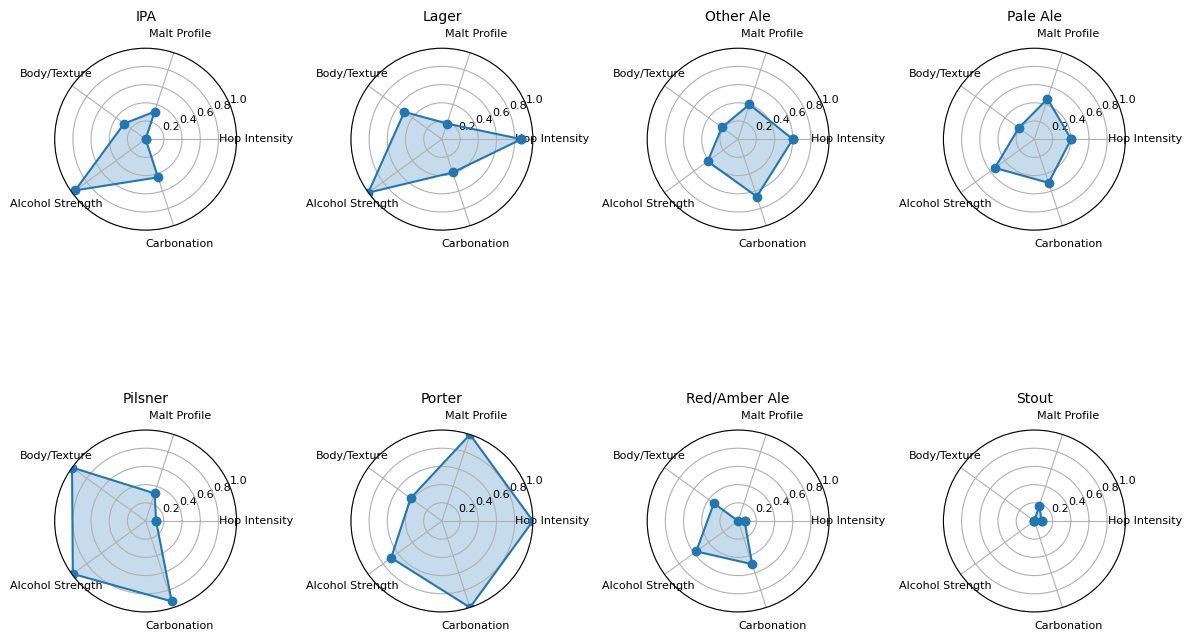

In [ ]:
pipeline.plot_grid_radar()

The results are highly dependant of the model that we used and are meaningless for Stout style. But we can still notice some interesting insights:

Porter: it stands out with the highest values for Hop Intensity, Malt Profile, and Carbonation.
This reflects its bold flavors and carbonation, aligning with expectations for robust, malt-forward beers.

Pilsner: it has the highest Body/Texture and Carbonation, consistent with its crisp, refreshing nature.
Its Hop Intensity is lower, aligning with its balanced, smooth profile.

Stout: scores very low across all characteristics, the model is quite small and didn't grasp its characteristics.

IPA: it shows very high Alcohol Strength, which makes sense it is typically higher ABV of IPAs. Lower Hop Intensity than expected.


If we take a look at the range of values:

Some styles (for example Porter, Pilsner) display distinct profiles with strong highs and lows, making them easier to differentiate.

Other styles (such sas Pale Ale, Red/Amber Ale) seem more balanced and less distinctive. This reflects their versatile flavor characeristics.

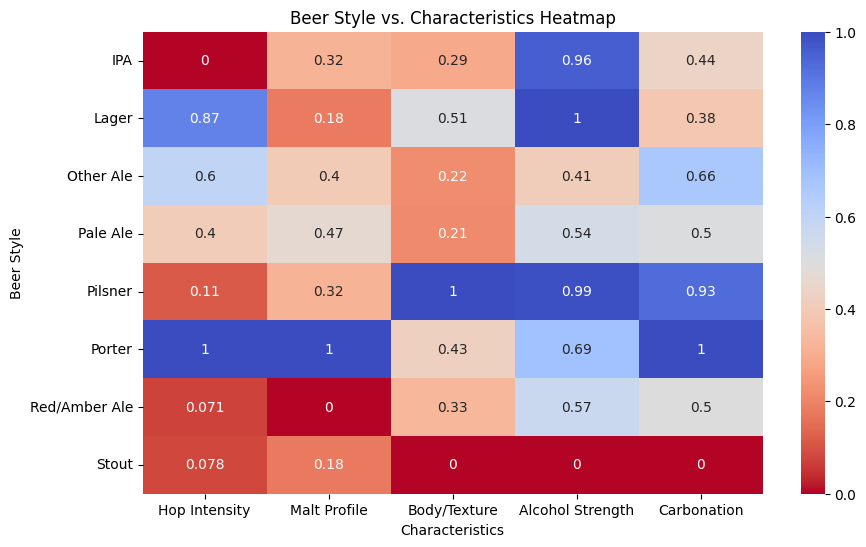

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(style_characteristics_scaled, annot=True, cmap="coolwarm_r", cbar=True)
plt.title("Beer Style vs. Characteristics Heatmap")
plt.xlabel("Characteristics")
plt.ylabel("Beer Style")
plt.show()
